# Preamble

In [1]:
from matplotlib import pyplot as plt
from tensorflow import keras as ks
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from tensorflow.keras.regularizers import l1 , l2
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
tf_random = 2
epochs_ = 20
tf.compat.v1.enable_eager_execution()
print("Is GPU AVAILABLE?" , tf.test.is_gpu_available())
df = pd.read_csv('ecg.csv',header=None)
print('Data Shape:',df.shape)
display(df.head())

Is GPU AVAILABLE? True
Data Shape: (4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [2]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432518,3.579448,4.425976,7.402103,1.000000


# Helper Functions

In [3]:
class ShallowAutoEncoder(Model):
  def __init__(self, output_units, code_size=10):
    super().__init__()
    self.encoder = Sequential([
      Dense(output_units, activation='relu'),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

class LassoRegAutoEncoder(Model):

  def __init__(self, output_units, code_size=10):
    super().__init__()
    self.encoder = Sequential([
      Dense(output_units, activation='relu' ),
      Dense(code_size, activation='relu', activity_regularizer=l2(10e-6))
    ])
    self.decoder = Sequential([
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
class UnderCompleteAutoEncoder(Model):
  def __init__(self, output_units, code_size=10):
    super().__init__()
    self.encoder = Sequential([
      Dense(output_units, activation='relu'),
      Dense(round(output_units/2), activation='relu'), 
      Dense(round(output_units/4), activation='relu'),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(round(output_units/2), activation='relu'),
      Dense(round(output_units/4), activation='relu'), 
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


class DropoutAutoEncoder(Model):
  def __init__(self, output_units, code_size=10):
    super().__init__()
    self.encoder = Sequential([
      Dense(output_units, activation='relu'),
      Dropout(0.2),
      Dense(round(output_units/2), activation='relu'),
      Dropout(0.2), 
      Dense(round(output_units/4), activation='relu'),
      Dropout(0.2),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(round(output_units/4), activation='relu'),
      Dropout(0.2),
      Dense(round(output_units/2), activation='relu'),
      Dropout(0.2), 
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.mse(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

# Data Preparation

In [4]:
# Split features and target variable
X = df.drop(140,axis=1)
y =  df[140]

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

# for novelty-detection we can only use the positive/normal class
train_indices = y_train[y_train == 1].index
train_data = x_train.loc[train_indices]

# scale the data according to positive/normal class
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(train_data.copy())
x_test_scaled = scaler.transform(x_test.copy())

# Base Model - Shallow Autoencoder

In [5]:
tf.set_random_seed(tf_random)
model = ShallowAutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='mse', metrics=['accuracy','mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs_,
    validation_data=(x_test_scaled, x_test_scaled)
)

Train on 2325 samples, validate on 1000 samples
Epoch 1/20
2325/2325 [==============================] - 7s 3ms/sample - loss: 0.0180 - acc: 0.0082 - mean_squared_error: 0.0180 - val_loss: 0.0226 - val_acc: 0.0500 - val_mean_squared_error: 0.0226
Epoch 2/20
2325/2325 [==============================] - 1s 540us/sample - loss: 0.0094 - acc: 0.1548 - mean_squared_error: 0.0094 - val_loss: 0.0197 - val_acc: 0.0810 - val_mean_squared_error: 0.0197
Epoch 3/20
2325/2325 [==============================] - 1s 606us/sample - loss: 0.0070 - acc: 0.1355 - mean_squared_error: 0.0070 - val_loss: 0.0170 - val_acc: 0.1020 - val_mean_squared_error: 0.0170
Epoch 4/20
2325/2325 [==============================] - 1s 514us/sample - loss: 0.0049 - acc: 0.1785 - mean_squared_error: 0.0049 - val_loss: 0.0150 - val_acc: 0.1640 - val_mean_squared_error: 0.0150
Epoch 5/20
2325/2325 [==============================] - 1s 509us/sample - loss: 0.0040 - acc: 0.2013 - mean_squared_error: 0.0040 - val_loss: 0.0141 - val

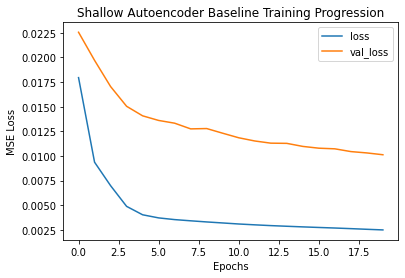

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Shallow Autoencoder Baseline Training Progression')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [7]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.006032027807025955


0.941

Text(0.5, 1.0, 'Shallow Autoencoder Confusion Matrix')

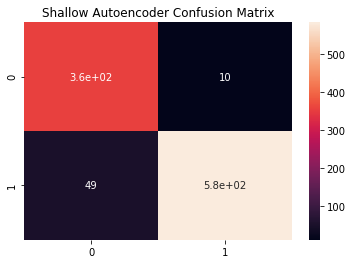

In [8]:
sns.heatmap(
    cm(predictions , y_test),
    annot=True
)
plt.title('Shallow Autoencoder Confusion Matrix')

# Lasso Regularisation

In [9]:
tf.set_random_seed(tf_random)
model = LassoRegAutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='mse', metrics=['accuracy','mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs_,
    validation_data=(x_test_scaled, x_test_scaled)
)

Train on 2325 samples, validate on 1000 samples
Epoch 1/20
2325/2325 [==============================] - 4s 2ms/sample - loss: 0.0180 - acc: 0.0069 - mean_squared_error: 0.0180 - val_loss: 0.0232 - val_acc: 0.0490 - val_mean_squared_error: 0.0231
Epoch 2/20
2325/2325 [==============================] - 2s 857us/sample - loss: 0.0092 - acc: 0.1527 - mean_squared_error: 0.0091 - val_loss: 0.0192 - val_acc: 0.0940 - val_mean_squared_error: 0.0190
Epoch 3/20
2325/2325 [==============================] - 2s 867us/sample - loss: 0.0068 - acc: 0.1604 - mean_squared_error: 0.0066 - val_loss: 0.0178 - val_acc: 0.1320 - val_mean_squared_error: 0.0177
Epoch 4/20
2325/2325 [==============================] - 2s 794us/sample - loss: 0.0056 - acc: 0.1751 - mean_squared_error: 0.0054 - val_loss: 0.0170 - val_acc: 0.1110 - val_mean_squared_error: 0.0168
Epoch 5/20
2325/2325 [==============================] - 2s 739us/sample - loss: 0.0050 - acc: 0.1772 - mean_squared_error: 0.0047 - val_loss: 0.0165 - val

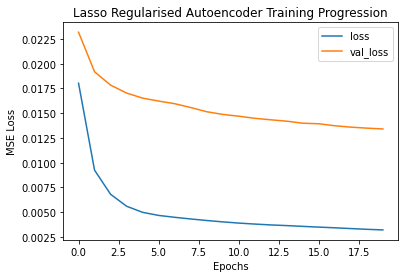

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lasso Regularised Autoencoder Training Progression')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [11]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.008343182754690025


0.93

<AxesSubplot:title={'center':'Lasso Regularised Autoencoder Confusion Matrix'}>

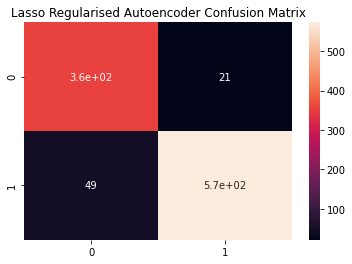

In [12]:
plt.title('Lasso Regularised Autoencoder Confusion Matrix')
sns.heatmap(
    cm(predictions , y_test),
    annot=True
)

# Undercomplete Autoencoder

In [13]:
tf.set_random_seed(tf_random)
model = UnderCompleteAutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='mse', metrics=['accuracy','mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs_,
    validation_data=(x_test_scaled, x_test_scaled)
)

Train on 2325 samples, validate on 1000 samples
Epoch 1/20
2325/2325 [==============================] - 5s 2ms/sample - loss: 0.0136 - acc: 0.0744 - mean_squared_error: 0.0136 - val_loss: 0.0201 - val_acc: 0.1010 - val_mean_squared_error: 0.0201
Epoch 2/20
2325/2325 [==============================] - 4s 2ms/sample - loss: 0.0063 - acc: 0.2013 - mean_squared_error: 0.0063 - val_loss: 0.0179 - val_acc: 0.1390 - val_mean_squared_error: 0.0179
Epoch 3/20
2325/2325 [==============================] - 2s 762us/sample - loss: 0.0044 - acc: 0.2314 - mean_squared_error: 0.0044 - val_loss: 0.0159 - val_acc: 0.1510 - val_mean_squared_error: 0.0159
Epoch 4/20
2325/2325 [==============================] - 1s 588us/sample - loss: 0.0038 - acc: 0.2340 - mean_squared_error: 0.0038 - val_loss: 0.0147 - val_acc: 0.1570 - val_mean_squared_error: 0.0147
Epoch 5/20
2325/2325 [==============================] - 1s 598us/sample - loss: 0.0034 - acc: 0.2563 - mean_squared_error: 0.0034 - val_loss: 0.0136 - val_a

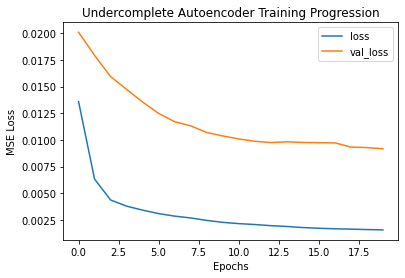

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Undercomplete Autoencoder Training Progression')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [15]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.004344043138412186


0.976

<AxesSubplot:title={'center':'Undercomplete Autoencoder Confusion Matrix'}>

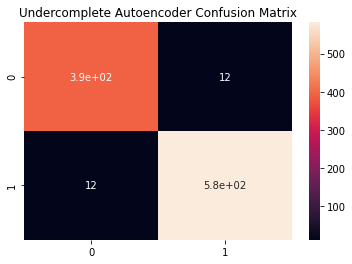

In [16]:
plt.title('Undercomplete Autoencoder Confusion Matrix')
sns.heatmap(
    cm(predictions , y_test),
    annot=True
)

# Dropout

In [17]:
tf.set_random_seed(tf_random)
model = DropoutAutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='mse', metrics=['accuracy','mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=epochs_,
    validation_data=(x_test_scaled, x_test_scaled)
)

Train on 2325 samples, validate on 1000 samples
Epoch 1/20
2325/2325 [==============================] - 9s 4ms/sample - loss: 0.0152 - acc: 0.0314 - mean_squared_error: 0.0152 - val_loss: 0.0224 - val_acc: 0.1000 - val_mean_squared_error: 0.0224
Epoch 2/20
2325/2325 [==============================] - 2s 713us/sample - loss: 0.0103 - acc: 0.0671 - mean_squared_error: 0.0103 - val_loss: 0.0215 - val_acc: 0.0980 - val_mean_squared_error: 0.0215
Epoch 3/20
2325/2325 [==============================] - 2s 744us/sample - loss: 0.0093 - acc: 0.1067 - mean_squared_error: 0.0093 - val_loss: 0.0206 - val_acc: 0.1210 - val_mean_squared_error: 0.0206
Epoch 4/20
2325/2325 [==============================] - 3s 2ms/sample - loss: 0.0081 - acc: 0.1475 - mean_squared_error: 0.0081 - val_loss: 0.0196 - val_acc: 0.1470 - val_mean_squared_error: 0.0196
Epoch 5/20
2325/2325 [==============================] - 2s 837us/sample - loss: 0.0074 - acc: 0.1824 - mean_squared_error: 0.0074 - val_loss: 0.0193 - val_a

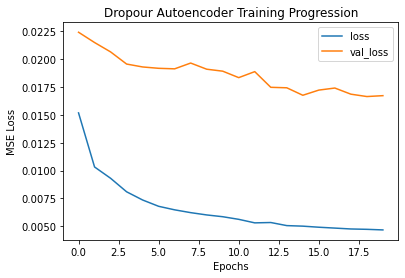

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Dropour Autoencoder Training Progression')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [19]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.009007536759312686


0.971

<AxesSubplot:title={'center':'Dropout Autoencoder Training Progression'}>

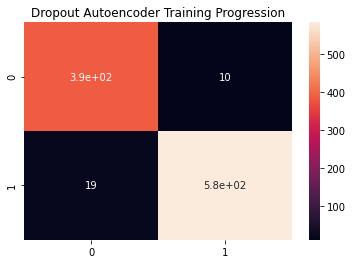

In [20]:
plt.title('Dropout Autoencoder Training Progression')
sns.heatmap(
    cm(predictions , y_test),
    annot=True
)